# Customer Churn Prediction
### Created By : Dwi Pamuji Bagaskara
Source : https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

# Content
1. Business Problem Understanding
1. Data Understanding
1. Exploratory Data Analysis
1. Data Preprocessing
1. Modeling and Evaluation
1. Hyperparameter Tuning
1. Compare Model Predict dengan Actual
1. Test Machine Learning
1. Conclution

*****

# **Business Problem Understanding**

<font size = "4">**Context :**</font>

Almost all bank companies have credit card facilities, to keep customers loyal and move to other cradit card a challenge for each bank companies. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

Target :

0 : Existing Customer (Customer will stay)

1 : Attrited Customer (Customer will churn)

<font size = "4">**Problem Statement :**</font>

In the field of banking companies, apart from looking for new customers, it is important to keep customers in our company. how the bank retains its customers is to give more attention or more promotion to customers who are about to leave the bank so that customers don't leave the bank

And if attention and promotion are given equally to all customers, then the costs will be large

<font size = "4">**Goals :**</font>

So based on these problems, the company wants to have the ability to predict the possibility that someone will churn or move to another company or not, so they can focus the promo on customers who will churn so they don't move to other banks.

and also, the company wants to know what factors/variables make someone churn and switch to another company

<font size = "4">**Analytic Approach :**</font>

So what we're going to do is analyze the data to find patterns that differentiate customers who will churn or not. Then we will create a classification model that will help companies predict the probability that a candidate will churn

# Data Understanding

> ## Dataset ```BankChurners.csv```
- i got this dataset from kaggle https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers, the creator get this dataset from a website with the URL as https://leaps.analyttica.com/home.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| CLIENTNUM | int64 | Client number. Unique identifier for the customer holding the account |
| Attrition_Flag | object | Internal event (customer activity) variable - if the account is closed then 1 else 0 |
| Customer_Age | int64 | Demographic variable - Customer's Age in Years |
| Gender | object | Demographic variable - M=Male, F=Female |
| Dependent_count | object | Demographic variable - Number of dependents |
| Education_Level | object | Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc. |
| Marital_Status | object | Demographic variable - Married, Single, Divorced, Unknown |
| Income_Category | object | Demographic variable - Annual Income Category of the account holder (< 40K, 40K-60K, 60K-80K, 80K-120K, > 120k) |
| Card_Category | object | Product Variable - Type of Card (Blue, Silver, Gold, Platinum |
| Months_on_book | int64 | Period of relationship with bank |
| Total_Relationship_Count | int64 | Total no. of products held by the customer |
| Months_Inactive_12_mon | int64 | No. of months inactive in the last 12 months |
| Contacts_Count_12_mon | int64 | No. of Contacts in the last 12 months |
| Credit_Limit | float64 | Credit Limit on the Credit Card |
| Total_Revolving_Bal | int64 | Total Revolving Balance on the Credit Card |
| Avg_Open_To_Buy | float64 | Open to Buy Credit Line (Average of last 12 months) |
| Total_Amt_Chng_Q4_Q1 | float64 | Change in Transaction Amount (Q4 over Q1) |
| Total_Trans_Amt | int64 | Total Transaction Amount (Last 12 months) |
| Total_Trans_Ct | int64 | Total Transaction Count (Last 12 months) |
| Total_Ct_Chng_Q4_Q1 | float64 | Change in Transaction Count (Q4 over Q1) |
| Avg_Utilization_Ratio | float64 | Average Card Utilization Ratio |

In [1]:
# Dataframe
import pandas as pd
import numpy as np

# Data Visualitation
import matplotlib.pyplot as plt
import seaborn as sns

#Missing Value
import missingno

# Handling Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("BankChurners.csv")
# Drop last 2 column, cause this not give any information. this feature is results from previous research
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,CLIENTNUM,int64,0,0.0,10127,"[716225433, 713895633]"
1,Attrition_Flag,object,0,0.0,2,"[Attrited Customer, Existing Customer]"
2,Customer_Age,int64,0,0.0,45,"[38, 37]"
3,Gender,object,0,0.0,2,"[M, F]"
4,Dependent_count,int64,0,0.0,6,"[0, 4]"
5,Education_Level,object,0,0.0,7,"[Unknown, Uneducated]"
6,Marital_Status,object,0,0.0,4,"[Divorced, Married]"
7,Income_Category,object,0,0.0,6,"[$40K - $60K, Unknown]"
8,Card_Category,object,0,0.0,4,"[Blue, Silver]"
9,Months_on_book,int64,0,0.0,44,"[21, 23]"


# Exploratory Data Analysis

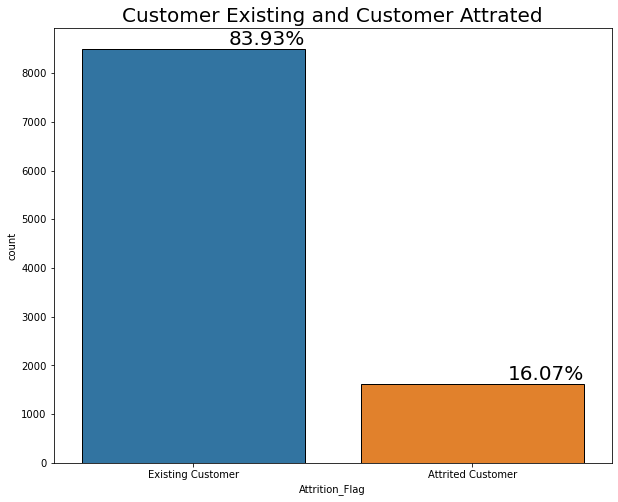

In [4]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Attrition_Flag"], edgecolor = 'black')
plt.title('Customer Existing and Customer Attrated', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 1.jpg')
plt.show()

we can see from this plot, customers who choose move to another bank is 16.07%

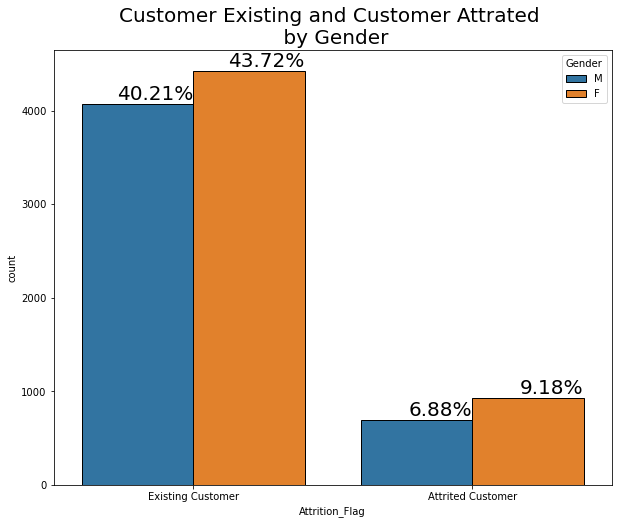

In [5]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Attrition_Flag"], hue=df["Gender"], edgecolor = 'black')
plt.title('Customer Existing and Customer Attrated \n by Gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 2.jpg')
plt.show()

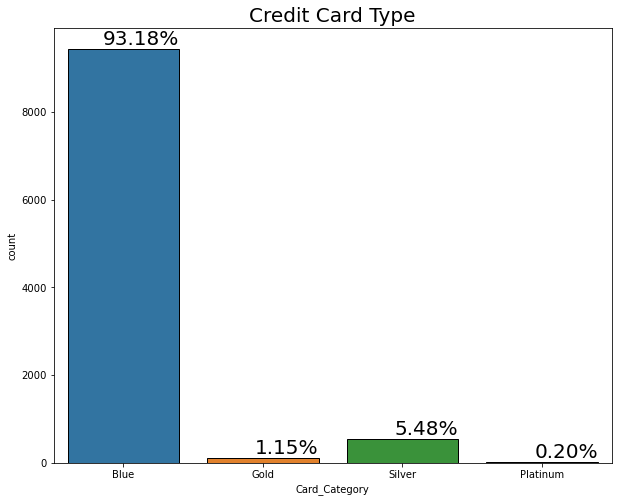

In [6]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Card_Category"], edgecolor = 'black')
plt.title('Credit Card Type', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 3.jpg')
plt.show()

we can see almost all custumer used blue credit card type

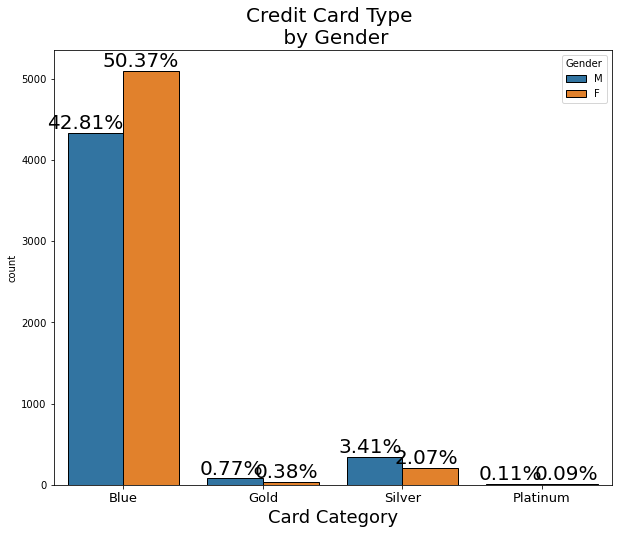

In [7]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Card_Category"], hue=df["Gender"], edgecolor = 'black')
plt.title('Credit Card Type \n by Gender', fontsize=20)
plt.xlabel('Card Category', fontsize=18)
plt.xticks(size = 13)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 4.jpg')
plt.show()

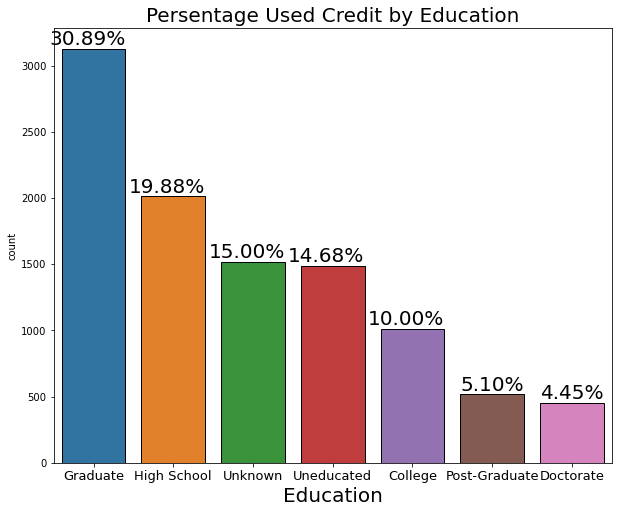

In [8]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Education_Level"], edgecolor = 'black', order = df["Education_Level"].value_counts().index)
plt.title('Persentage Used Credit by Education', fontsize=20)
plt.xlabel('Education', fontsize = 20)
plt.xticks(size = 13)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 5.jpg')
plt.show()

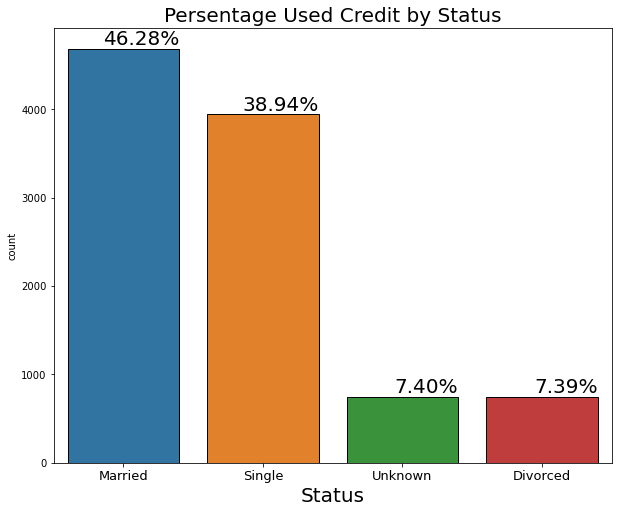

In [9]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Marital_Status"], edgecolor = 'black', order = df["Marital_Status"].value_counts().index)
plt.title('Persentage Used Credit by Status', fontsize=20)
plt.xlabel('Status', fontsize = 20)
plt.xticks(size = 13)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 6.jpg')
plt.show()

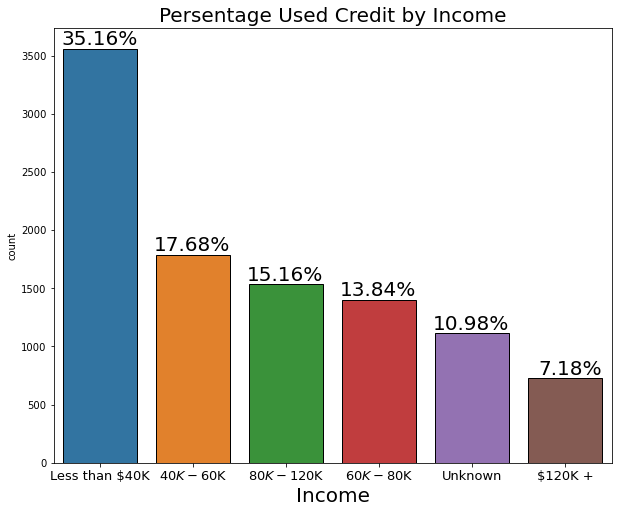

In [10]:
plt.figure(figsize=(10,8))
total = float(len(df))
ax = sns.countplot(x=df["Income_Category"], edgecolor = 'black', order = df["Income_Category"].value_counts().index)
plt.title('Persentage Used Credit by Income', fontsize=20)
plt.xlabel('Income', fontsize = 20)
plt.xticks(size = 13)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom', fontsize = 20)

plt.savefig('EDA 7.jpg')
plt.show()

# Data Preprocessing

> ## **Identify Outlier, Duplicates, missing value etc**

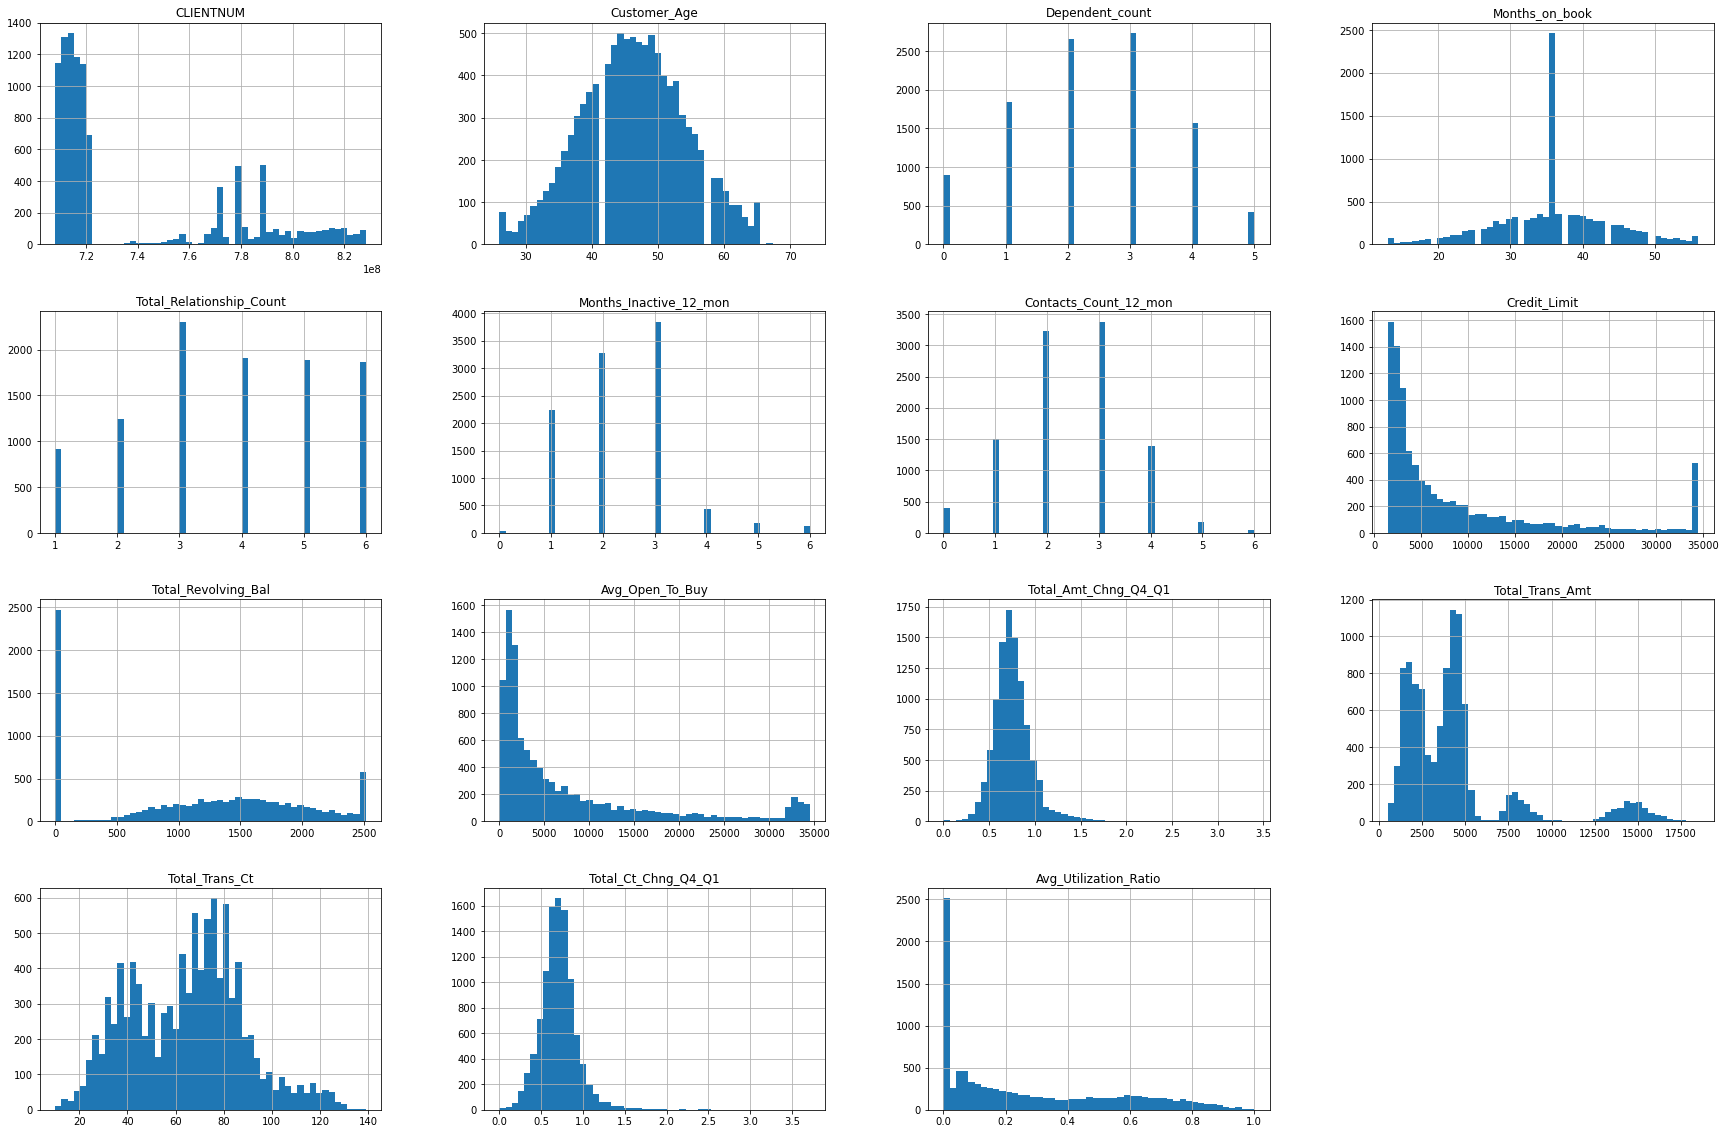

In [11]:
# Distribution plot to visualize data distribution
df.hist(bins=50,figsize=(30,20))
plt.savefig('Data Preprocessing 1 - Distribution Plot.jpg')
plt.show()

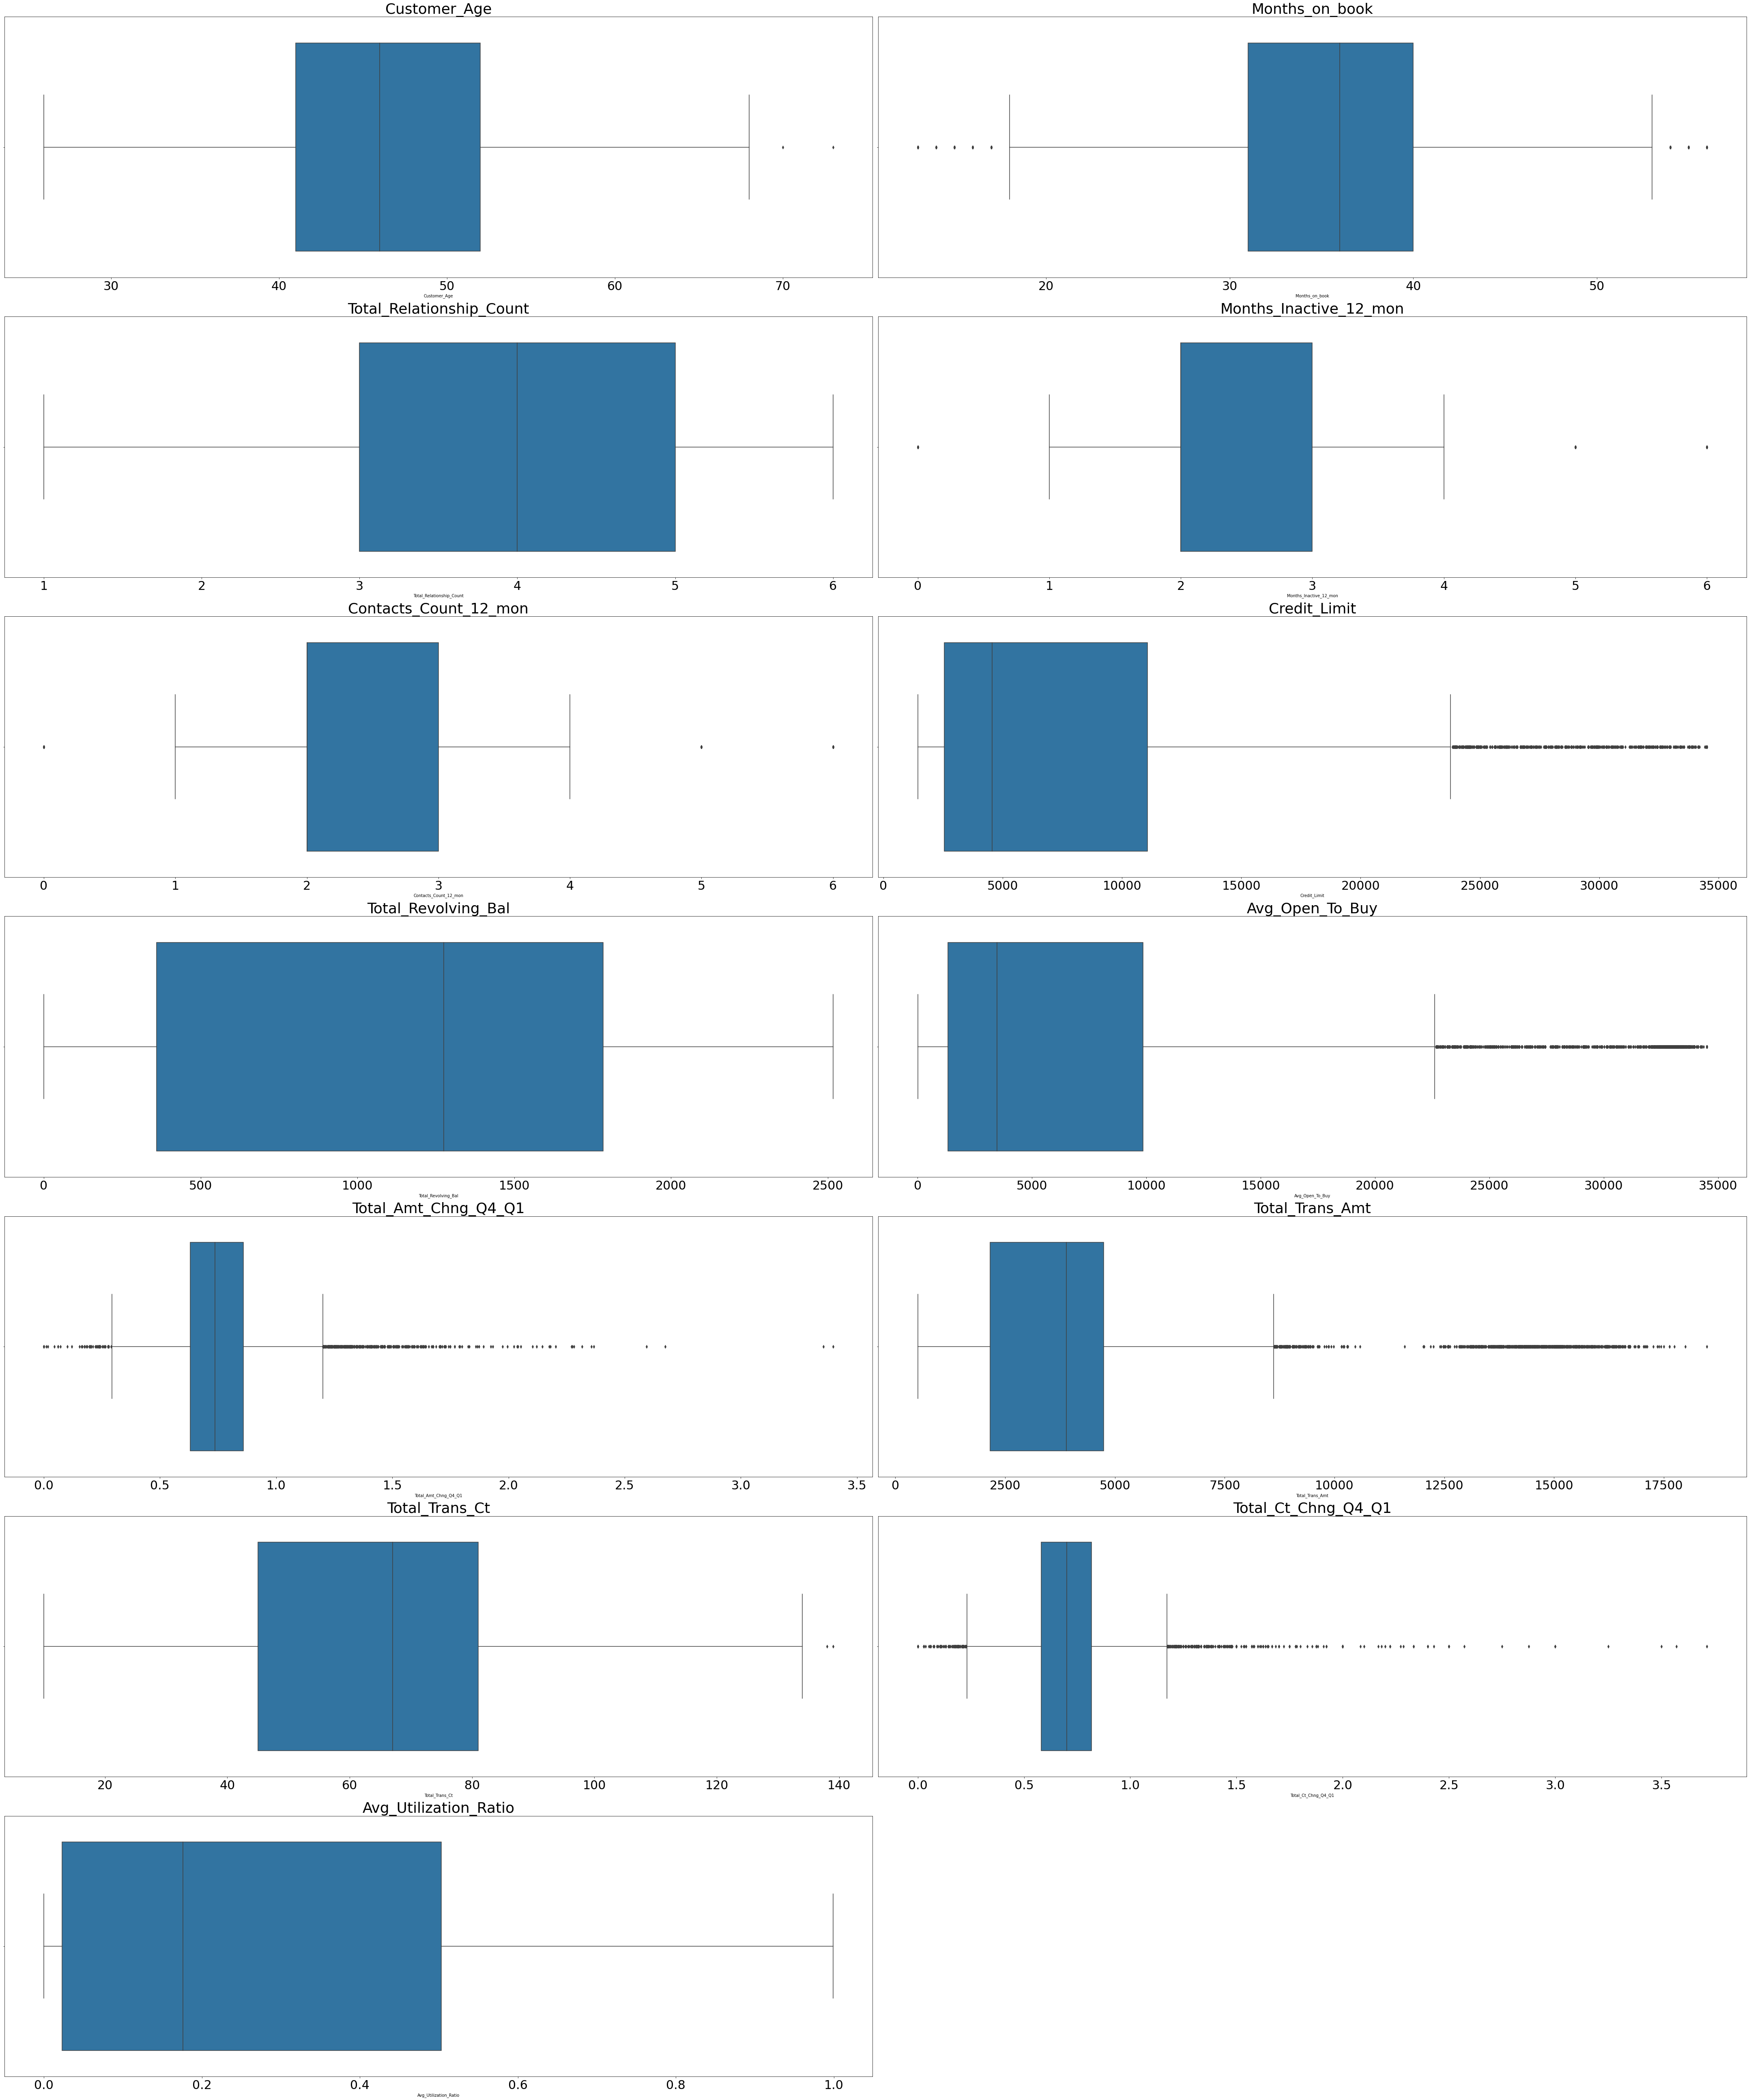

In [12]:
# plot for outliers detection
num_feat = df.drop(["CLIENTNUM",
                    "Attrition_Flag",
                    "Gender",
                    "Dependent_count",
                    "Education_Level",
                    "Marital_Status",
                    "Income_Category",
                    "Card_Category"],
                   axis = 1)

plt.figure(figsize=(60,72))
for i in range(len(num_feat.columns)):
    plt.subplot(7,2,i+1)
    sns.boxplot(num_feat[num_feat.columns[i]])
    plt.title(num_feat.columns[i], fontsize = 36)
    plt.xticks(fontsize = 30)
    
plt.tight_layout()
plt.savefig('Data Preprocessing 2 - Box Plot Check Outlier.jpg')
plt.show()

In [13]:
# creating function to generate IQR, lower limit, and Upper limit

def find_outlier(df, feature):
    print('Outlier ' + feature)
    q1 = df[feature].quantile(0.25)
    q2 = df[feature].quantile(0.50)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    Lower_Limit = q1 - limit
    if Lower_Limit < 0 :
        Lower_Limit = 0
    Upper_Limit = q3 + limit
    print(f'Lower_Limit: {Lower_Limit}')
    print(f'median: {q2}')
    print(f'Upper_Limit: {Upper_Limit}')
    print('_________________________')

    

In [14]:
# check IQR, upper limit, and lower limit for each feature

for i in num_feat :
    find_outlier(num_feat, i)

Outlier Customer_Age
IQR: 11.0
Lower_Limit: 24.5
median: 46.0
Upper_Limit: 68.5
_________________________
Outlier Months_on_book
IQR: 9.0
Lower_Limit: 17.5
median: 36.0
Upper_Limit: 53.5
_________________________
Outlier Total_Relationship_Count
IQR: 2.0
Lower_Limit: 0.0
median: 4.0
Upper_Limit: 8.0
_________________________
Outlier Months_Inactive_12_mon
IQR: 1.0
Lower_Limit: 0.5
median: 2.0
Upper_Limit: 4.5
_________________________
Outlier Contacts_Count_12_mon
IQR: 1.0
Lower_Limit: 0.5
median: 2.0
Upper_Limit: 4.5
_________________________
Outlier Credit_Limit
IQR: 8512.5
Lower_Limit: 0
median: 4549.0
Upper_Limit: 23836.25
_________________________
Outlier Total_Revolving_Bal
IQR: 1425.0
Lower_Limit: 0
median: 1276.0
Upper_Limit: 3921.5
_________________________
Outlier Avg_Open_To_Buy
IQR: 8534.5
Lower_Limit: 0
median: 3474.0
Upper_Limit: 22660.75
_________________________
Outlier Total_Amt_Chng_Q4_Q1
IQR: 0.22799999999999998
Lower_Limit: 0.28900000000000003
median: 0.736
Upper_Li

In [15]:
# creating outliers columns
out1 = df[(df['Customer_Age'] > 68.5) | (df['Customer_Age'] < 24.5)]
out2 = df[(df['Months_on_book'] > 53.5) | (df['Months_on_book'] < 17.5)]
out3 = df[(df['Total_Relationship_Count'] > 8.0) | (df['Total_Relationship_Count'] < 0)]
out4 = df[(df['Months_Inactive_12_mon'] > 4.5) | (df['Months_Inactive_12_mon'] < 0.5)]
out5 = df[(df['Contacts_Count_12_mon'] > 4.5) | (df['Contacts_Count_12_mon'] < 0.5)]
out6 = df[(df['Credit_Limit'] > 23836.25) | (df['Credit_Limit'] < 0)]
out7 = df[(df['Total_Revolving_Bal'] > 3921.5) | (df['Total_Revolving_Bal'] < 0)]
out8 = df[(df['Avg_Open_To_Buy'] > 22660.75) | (df['Avg_Open_To_Buy'] < 0)]
out9 = df[(df['Total_Amt_Chng_Q4_Q1'] > 1.201) | (df['Total_Amt_Chng_Q4_Q1'] < 0.28900000000000003)]
out10 = df[(df['Total_Trans_Amt'] > 8619.25) | (df['Total_Trans_Amt'] < 0)]
out11 = df[(df['Total_Trans_Ct'] > 135.0) | (df['Total_Trans_Ct'] < 0)]
out12 = df[(df['Total_Ct_Chng_Q4_Q1'] > 1.172) | (df['Total_Ct_Chng_Q4_Q1'] < 0.22799999999999998)]
out13 = df[(df['Avg_Utilization_Ratio'] > 1.2229999999999999) | (df['Avg_Utilization_Ratio'] < 0)]

In [16]:
# creating outliers dataframe
out_all = pd.concat([out1, out2, out3, out4, out5, out6, out7, out8, out9, out10, out11, out12, out13], axis = 0)
out_all.drop_duplicates(inplace=True)
out_all.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
251,715952883,Existing Customer,73,M,0,High School,Married,$40K - $60K,Blue,36,...,3,2,4469.0,1125,3344.0,1.363,1765,34,1.615,0.252
254,787348608,Existing Customer,70,M,0,High School,Married,Less than $40K,Blue,56,...,2,3,3252.0,1495,1757.0,0.581,1227,15,0.875,0.460
11,710821833,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,...,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
18,806160108,Existing Customer,61,M,1,High School,Married,$40K - $60K,Blue,56,...,2,3,3193.0,2517,676.0,1.831,1336,30,1.143,0.788
27,804424383,Existing Customer,63,M,1,Unknown,Married,$60K - $80K,Blue,56,...,3,2,10215.0,1010,9205.0,0.843,1904,40,1.000,0.099


In [17]:
#check outliers percentage

print('Percentage Outlier')
len(out_all)/len(df)*100

Percentage Outlier


32.84289523057174

we will keep outlier because we asume there is social inequality

> ## **Check Duplicated Data**

In [18]:
#check whether there is any duplicate value
pd.DataFrame({'Duplicated Data' : df[df.duplicated()].sum()})

,Duplicated Data
CLIENTNUM,0.0
Attrition_Flag,0.0
Customer_Age,0.0
Gender,0.0
Dependent_count,0.0
Education_Level,0.0
Marital_Status,0.0
Income_Category,0.0
Card_Category,0.0
Months_on_book,0.0


> ## Missing Value

In [19]:
# check missing value
miss = pd.DataFrame({'Missing Value' : df.isna().sum()})
miss[miss['Missing Value'] > 0 ]

,Missing Value


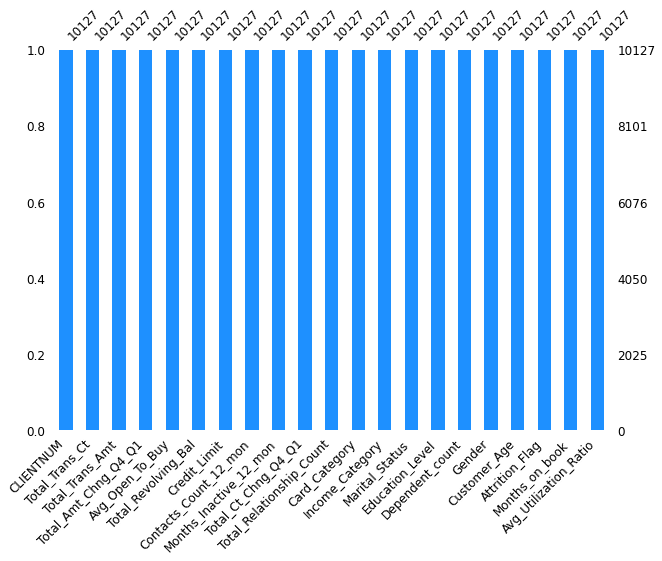

In [20]:
# plot to visualize the missing value proportion
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,7), fontsize=12)
plt.savefig('Data Preprocessing 3 - Check Missing Value.jpg')
plt.show()

this dataset not have duplicated data or missing value

# Modeling and Evaluation

In [21]:
# Import library for Modeling and Evaluatiom

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

import category_encoders as ce
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

## **Confusion Metric**

**Confusion Matrix** is a performance measurement for the machine learning classification problems where the output can be two or more classes. It is a table with combinations of predicted and actual values. A confusion matrix is defined as thetable that is often used to describe the performance of a classification model on a set of the test data for which the true values are known.

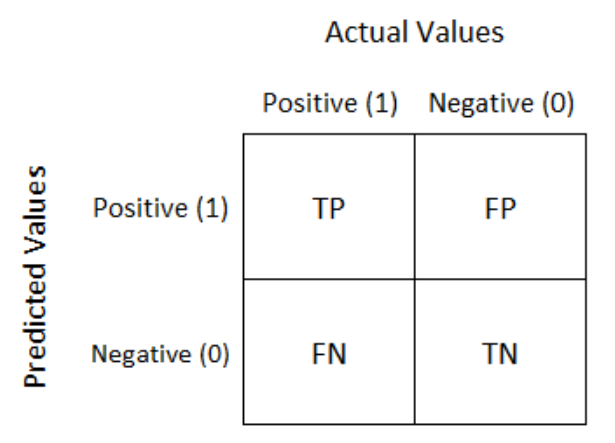

Image Source — https://www.roelpeters.be/glossary/what-is-a-confusion-matrix/

It is extremely useful for measuring the Recall, Precision, Accuracy, and AUC-ROC curves.

For this case target is :

0 : Existing Customer

1 : Attrited Customer

---
True Positive: We predicted positive and it’s true. **We predicted that customer will churn** and actually **churn**.

True Negative: We predicted negative and it’s true. **We predicted that customer is not churn** and actually **not churn**.

False Positive (Type 1 Error)- We predicted positive and it’s false. **We predicted that customer will churn** and actually **not churn**.

False Negative (Type 2 Error)- We predicted negative and it’s false. **We predicted that customer is not churn** and actually **churn**

some other metrics of the confusion matrix : 
    
1. **Precision** explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where **False Positive is a higher concern than False Negatives**. Precision for a label is defined as the number of **true positives divided by the number of predicted positives**.

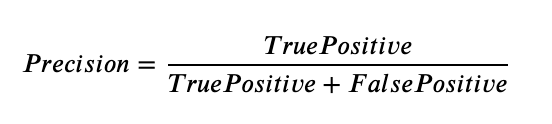

2. **Recall (Sensitivity)** explains how many of the actual positive cases we were able to predict correctly with our model. It is a useful metric in cases where **False Negative is of higher concern than False Positive**. Recall for a label is defined as the number of **true positives divided by the total number of actual positives**.

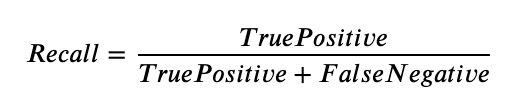

3. **F1 Score** It gives a combined idea about Precision and Recall metrics. It is maximum when Precision is equal to Recall. F1 Score is the harmonic mean of precision and recall.

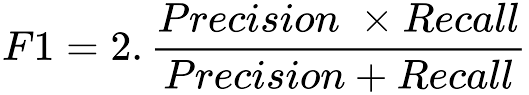

The F1 score punishes extreme values more. F1 Score could be an effective evaluation metric in the following cases:

    - When FP and FN are equally costly.
    - Adding more data doesn’t effectively change the outcome
    - True Negative is high

4. ROC/AUC, The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold values and separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes. From the graph, we simply say the area of the curve ABDE and the X and Y-axis.

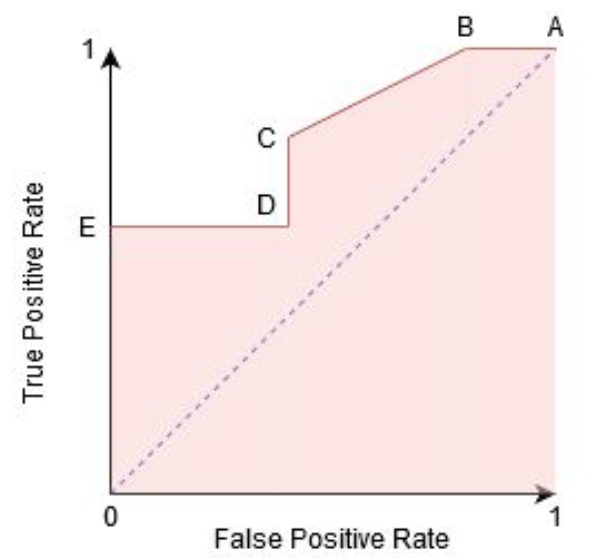 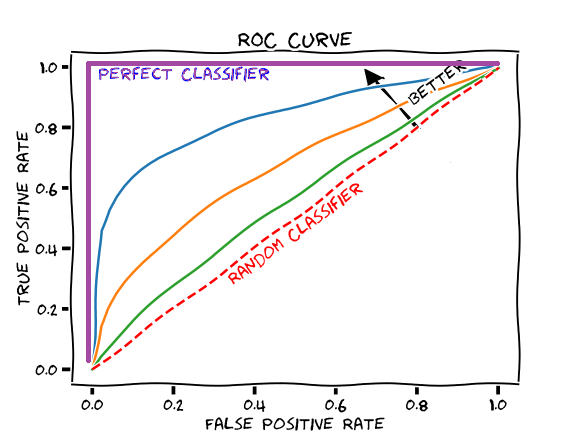

for this case we will use metric **F1-Score** cause we will fokus to recall and precision, and to strengthen analysis we will use **ROC/AUC** too, cause this data is imbalace that has large effect on PR but not ROC/AUC.

## **Approaching Categorical Features**

We will separate ordinal variable and nominal variable: 

Ordinal Variable in this data:
1. Income_Category
1. Card_Category
1. Education_Level

Nominal Variable in this data:
1. Gender
1. Dependent_count
1. Attrition_Flag
1. Marital_Status

In [22]:
df_raw = df.copy()
df_raw.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [23]:
# Ordinal Variable
Income_Category_map = {
    'Less than $40K' : 0,
    '$40K - $60K'    : 1,
    '$60K - $80K'    : 2,
    '$80K - $120K'   : 3,
    '$120K +'        : 4,
    'Unknown'        : 5
}

Card_Category_map = {
    'Blue'     : 0,
    'Silver'   : 1,
    'Gold'     : 2,
    'Platinum' : 3
}

Education_Level_map = {
    'Uneducated'    : 0,
    'High School'   : 1,
    'College'       : 2,
    'Graduate'      : 3,
    'Post-Graduate' : 4,
    'Doctorate'     : 5,
    'Unknown'       : 6
}

df.loc[:, 'Income_Category'] = df['Income_Category'].map(Income_Category_map)
df.loc[:, 'Card_Category'] = df['Card_Category'].map(Card_Category_map)
df.loc[:, 'Education_Level'] = df['Education_Level'].map(Education_Level_map)

# Nominal Variable

Gender_map = {
    'M' : 0,
    'F' : 1
}

Attrition_Flag_map = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
}

Marital_Status_map = {
    'Single' : 0,
    'Married' : 1,
    'Divorced' : 2,
    'Unknown' : 3
}


df.loc[:, 'Gender'] = df['Gender'].map(Gender_map)
df['Dependent_count'].astype(int)
df.loc[:, 'Attrition_Flag'] = df['Attrition_Flag'].map(Attrition_Flag_map)
df.loc[:, 'Marital_Status'] = df['Marital_Status'].map(Marital_Status_map)

In [24]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,0,3,1,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,1,5,3,0,0,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,0,3,3,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,1,4,1,3,0,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,0,3,0,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## **Train Test Split**

Processing Scheme :

   1. Target : Attrition_Flag
   1. Standard Scaller : Customer_Age, Months_on_book, Total_Revolving_Bal, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1, Total_Trans_Ct
   1. Robust Scaller : Credit_Limit, Avg_Open_To_Buy, Total_Trans_Amt, Avg_Utilization_Ratio
   1. Out : CLIENTNUM

In [26]:
X = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis = 1)
y = df['Attrition_Flag']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, 
                                    y,
                                    test_size = 0.3, 
                                    random_state = 2022)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.astype('float')
y_test = y_test.astype('float')

In [28]:
st_scaler = StandardScaler()
rb_scaler = RobustScaler()

transformer = ColumnTransformer([
                ('standard scaler', st_scaler, ['Customer_Age', 'Months_on_book', 'Total_Revolving_Bal', 
                                             'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct']),
                ('robust scaler', rb_scaler, ['Credit_Limit', 'Avg_Open_To_Buy', 
                                             'Total_Trans_Amt', 'Avg_Utilization_Ratio'])
], remainder = "passthrough")

We use robust scaler cause dataset have many outlier

In [29]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [30]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard scaler', StandardScaler(),
                                 ['Customer_Age', 'Months_on_book',
                                  'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
                                  'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct']),
                                ('robust scaler', RobustScaler(),
                                 ['Credit_Limit', 'Avg_Open_To_Buy',
                                  'Total_Trans_Amt',
                                  'Avg_Utilization_Ratio'])])

## Modeling

We will compare 7 Model :
1. **Logistic Regression**
2. **K Nearest Neighbors Classifier**
3. **Decision Tree Classifier**
4. **Random Forest Classifier**
5. **AdaBoost Classifier**
6. **Gradient Boosting Classifier**
7. **XGBoost Classifier**

In [31]:
logreg = LogisticRegression(random_state = 2022)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state = 2022)
rf = RandomForestClassifier(random_state = 2022)
ab = AdaBoostClassifier(random_state = 2022)
gb = GradientBoostingClassifier(random_state = 2022)
xgb = XGBClassifier(eval_metric='auc', random_state = 2022)

In [32]:
list_model = {'Logistic Regression' : logreg, 'KNN' : knn, 'Decision Tree' : dt, 'Random Forest' : rf, 
              'AdaBoost' :ab, 'GradientBoost' : gb, 'XGBoost' : xgb}

In [33]:
models_list = [logreg, knn, dt, rf, ab, gb, xgb]

In [34]:
f1_score = []
mean_f1_score = []
std_f1_score = []
crossval = StratifiedKFold(n_splits=5)
def model_eval_f1_score(model):
    for i in model :
        estimator = Pipeline([
            ('transformer', transformer),
            ('model', list_model[i])
        ])
        model_cv = cross_val_score(estimator, X_train, y_train, cv = crossval, scoring = 'f1', error_score='raise')
        f1_score.append(model_cv)
        mean_f1_score.append(model_cv.mean())
        std_f1_score.append(model_cv.std())

In [35]:
roc_auc = []
mean_roc_auc = []
std_roc_auc = []
crossval = StratifiedKFold(n_splits=5)
def model_eval_roc_auc(model):
    for i in model :
        estimator = Pipeline([
            ('transformer', transformer),
            ('model', list_model[i])
        ])
        model_cv = cross_val_score(estimator, X_train, y_train, cv = crossval, scoring = 'roc_auc', error_score='raise')
        roc_auc.append(model_cv)
        mean_roc_auc.append(model_cv.mean())
        std_roc_auc.append(model_cv.std())

In [36]:
model_eval_f1_score(list_model)

In [37]:
model_eval_roc_auc(list_model)

In [38]:
model_b_tuning = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradientBoost', 'XGBoost'],
    'f1_Score' : f1_score,
    'f1_Score_Mean': mean_f1_score,
    'f1_Score_Std': std_f1_score,
    'roc_auc' : roc_auc,
    'roc_auc_Mean': mean_roc_auc,
    'roc_auc_Std': std_roc_auc
})

model_b_tuning

,model,f1_Score,f1_Score_Mean,f1_Score_Std,roc_auc,roc_auc_Mean,roc_auc_Std
0,Logistic Regression,"[0.6649616368286445, 0.670076726342711, 0.6475...",0.644201,0.026236,"[0.9393774508884177, 0.9125954556541644, 0.921...",0.921480,0.011112
1,KNN,"[0.6353591160220994, 0.6324786324786326, 0.576...",0.613972,0.032480,"[0.8919001069478583, 0.8935568606112915, 0.887...",0.886052,0.009502
2,Decision Tree,"[0.8269662921348314, 0.75, 0.7699115044247788,...",0.795195,0.031366,"[0.8966564722217012, 0.8389290203951443, 0.867...",0.875808,0.023121
3,Random Forest,"[0.8909512761020882, 0.8316831683168316, 0.831...",0.858483,0.025571,"[0.9881925811959398, 0.981179053230013, 0.9820...",0.985179,0.003017
4,AdaBoost,"[0.8623024830699774, 0.8226950354609929, 0.839...",0.852300,0.019034,"[0.9837307916017788, 0.9765915529954782, 0.982...",0.981962,0.003734
5,GradientBoost,"[0.9032258064516129, 0.8782816229116946, 0.863...",0.887280,0.016784,"[0.9891663695892827, 0.9825806330562696, 0.988...",0.987409,0.002957
6,XGBoost,"[0.9244444444444445, 0.8720379146919431, 0.903...",0.898873,0.019879,"[0.9947276582171605, 0.9874214308497664, 0.989...",0.990857,0.002708


Of the 7 models tested, the 3 best models is :

|No | Model | f1 score mean | roc/auc Mean |
| --- | --- | --- | --- |
|1. | **XGBoost Classifier** | 0.898873 | 0.990857 |
|2. | **Gradient Boost Classifier** | 0.887280	 | 0.987409 |
|3. | **Random Forest Classifier** | 0.858483 | 0.985179 |

# **Hyperparameter Tuning Best Models**

## **Random Forest**
**Random Forest named “forest” because it grows a forest of decision trees**. The data from these trees are then merged together to ensure the most accurate predictions. While a solo decision tree has one outcome and a narrow range of groups, the forest assures a more accurate result with a bigger number of groups and decisions. It has the added benefit of adding randomness to the model by finding the best feature among a random subset of features

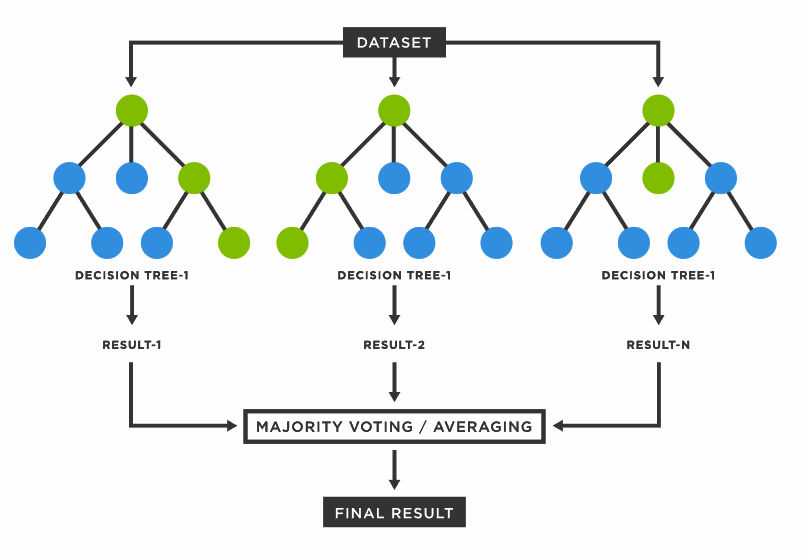

Source : https://www.tibco.com/reference-center/what-is-a-random-forest

## **Gradient Boosting Classifier**
Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. **The name gradient boosting arises because target outcomes for each case are set based on the gradient of the error with respect to the prediction**. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.

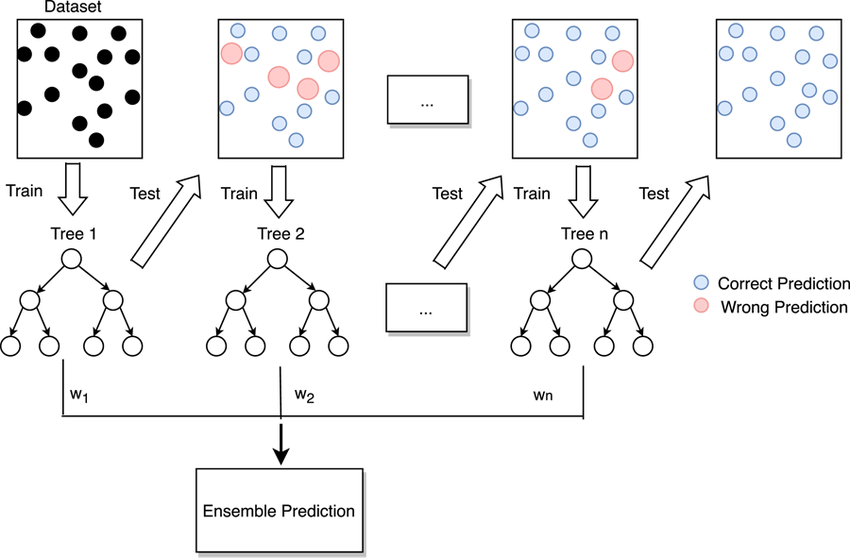

Source : https://www.researchgate.net/figure/Flow-diagram-of-gradient-boosting-machine-learning-method-The-ensemble-classifiers_fig1_351542039

## **XGBoost Classifier**
**XGBoost is eXtream Gradient Boosting is a specific implementation of the Gradient Boosting Model which uses more accurate approximations to find the best tree model**. XGBoost specifically used a more regularized model formalization to control overfitting, which gives it better perfomance.

**How XGBoost Works?**

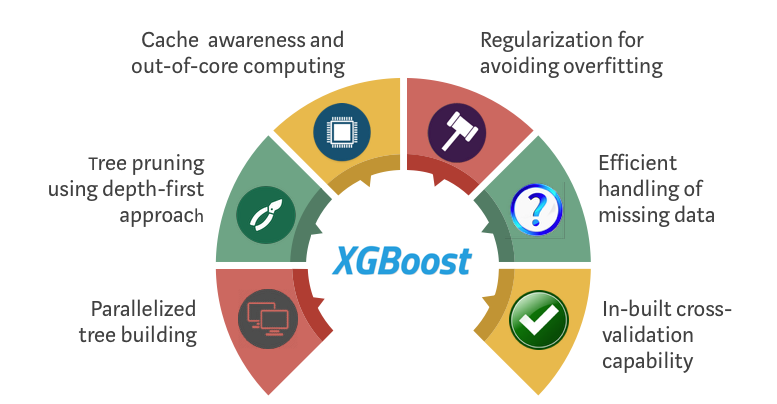

Source : https://algotech.netlify.app/blog/xgboost/

## **Hyperparameter Tuning XGBoost**

In [39]:
# Kedalaman pohon
max_depth = list(np.arange(15, 31))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 251))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 11/10))

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [40]:
# Benchmark model XGBoost
xgb = XGBClassifier(eval_metric='auc', random_state = 2022)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = StratifiedKFold(n_splits=5)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['f1', 'roc_auc'], 
    n_jobs = -1,
    refit = 'roc_auc', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 2022 
)

In [41]:
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('standard '
                                                                               'scaler',
                                                                               StandardScaler(),
                                                                               ['Customer_Age',
                                                                                'Months_on_book',
                                                                                'Total_Revolving_Bal',
                                                                                'Total_Amt_Chng_Q4_Q1',
                                                                                'Tota

In [42]:
pd.DataFrame(random_xgb.cv_results_).sort_values(by = ['rank_test_roc_auc', 'rank_test_f1']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_f1,rank_test_f1,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
32,4.939192,0.116531,0.030319,0.000798,0.4,0.16681,214,24,0.18,3,...,0.017207,5,0.994127,0.984123,0.990938,0.991039,0.990318,0.990109,0.003273,1
0,5.143648,0.104555,0.031115,0.001465,0.7,1.29155,159,30,0.1,3,...,0.026893,4,0.993883,0.984558,0.990086,0.991264,0.989811,0.989920,0.003043,2
11,6.148682,0.558891,0.027527,0.001493,0.8,0.002783,159,25,0.37,6,...,0.012754,1,0.993062,0.985440,0.990536,0.990509,0.989856,0.989881,0.002476,3
38,7.775738,0.176305,0.029521,0.001621,0.6,1.29155,210,24,0.11,4,...,0.021372,7,0.993763,0.982528,0.990397,0.991178,0.989905,0.989554,0.003756,4
17,8.336508,0.341520,0.027528,0.001493,0.8,0.16681,230,19,0.39,5,...,0.017846,2,0.993654,0.983804,0.989726,0.990588,0.989875,0.989529,0.003196,5
18,5.652885,0.202515,0.028324,0.000798,0.7,0.021544,166,29,0.46,4,...,0.024100,6,0.991527,0.984115,0.990577,0.991674,0.989202,0.989419,0.002794,6
33,5.752824,0.365888,0.027726,0.001596,0.4,0.16681,216,26,0.19,5,...,0.027872,9,0.993775,0.983718,0.988536,0.990829,0.990115,0.989394,0.003308,7
48,6.245710,0.074460,0.026728,0.001323,0.9,0.16681,174,20,0.38,5,...,0.020224,3,0.992945,0.982795,0.990604,0.991260,0.989244,0.989369,0.003497,8
5,6.612718,0.104511,0.026928,0.001092,0.7,0.464159,195,22,0.09,6,...,0.017384,8,0.993242,0.981871,0.990382,0.990768,0.989063,0.989065,0.003843,9
25,8.767956,0.440993,0.030119,0.001934,0.9,0.007743,204,15,0.62,8,...,0.021841,21,0.993215,0.985887,0.991050,0.987839,0.985721,0.988742,0.002947,10


In [43]:
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: 0.9901088935933082
Best_params: {'model__subsample': 0.4, 'model__reg_alpha': 0.1668100537200059, 'model__n_estimators': 214, 'model__max_depth': 24, 'model__learning_rate': 0.18, 'model__gamma': 3, 'model__colsample_bytree': 1.0}


In [44]:
model = random_xgb.best_estimator_
f1_score = []
mean_f1_score = []
std_f1_score = []
crossval = StratifiedKFold(n_splits=5)

model_cv = cross_val_score(model, X_train, y_train, cv = crossval, scoring = 'f1', error_score='raise')
f1_score.append(model_cv)
mean_f1_score.append(model_cv.mean())
std_f1_score.append(model_cv.std())

roc_auc = []
mean_roc_auc = []
std_roc_auc = []
crossval = StratifiedKFold(n_splits=5)

model_cv = cross_val_score(model, X_train, y_train, cv = crossval, scoring = 'roc_auc', error_score='raise')
roc_auc.append(model_cv)
mean_roc_auc.append(model_cv.mean())
std_roc_auc.append(model_cv.std())

In [45]:
model_a_tuning = pd.DataFrame({'model': 'XGBoost After Tuning',
    'f1_Score' : f1_score,
    'f1_Score_Mean': mean_f1_score,
    'f1_Score_Std': std_f1_score,
    'roc_auc' : roc_auc,
    'roc_auc_Mean': mean_roc_auc,
    'roc_auc_Std': std_roc_auc
})
model_a_tuning

,model,f1_Score,f1_Score_Mean,f1_Score_Std,roc_auc,roc_auc_Mean,roc_auc_Std
0,XGBoost After Tuning,"[0.9213483146067416, 0.8767772511848341, 0.878...",0.893576,0.017207,"[0.9941272491885096, 0.9841229337486163, 0.990...",0.990109,0.003273


## **Compare XGBoost Before Tuning and After Tuning**

In [46]:
compare_XGB = pd.concat([model_b_tuning.loc[model_b_tuning['model'] == 'XGBoost'], model_a_tuning], axis = 0).reset_index().drop('index', axis=1)
compare_XGB['model'].replace('XGBoost', 'XGBoost Before Tuning', inplace = True)
compare_XGB

,model,f1_Score,f1_Score_Mean,f1_Score_Std,roc_auc,roc_auc_Mean,roc_auc_Std
0,XGBoost Before Tuning,"[0.9244444444444445, 0.8720379146919431, 0.903...",0.898873,0.019879,"[0.9947276582171605, 0.9874214308497664, 0.989...",0.990857,0.002708
1,XGBoost After Tuning,"[0.9213483146067416, 0.8767772511848341, 0.878...",0.893576,0.017207,"[0.9941272491885096, 0.9841229337486163, 0.990...",0.990109,0.003273


XGBoost After Hyperparameter Tuning have lower than XGBoost before tuning, for next we will use XGBoost Before Tuning | XGBClassifier(eval_metric='auc', random_state = 2022)

## **Best Model**
> XGBClassifier(eval_metric='auc', random_state = 2022)

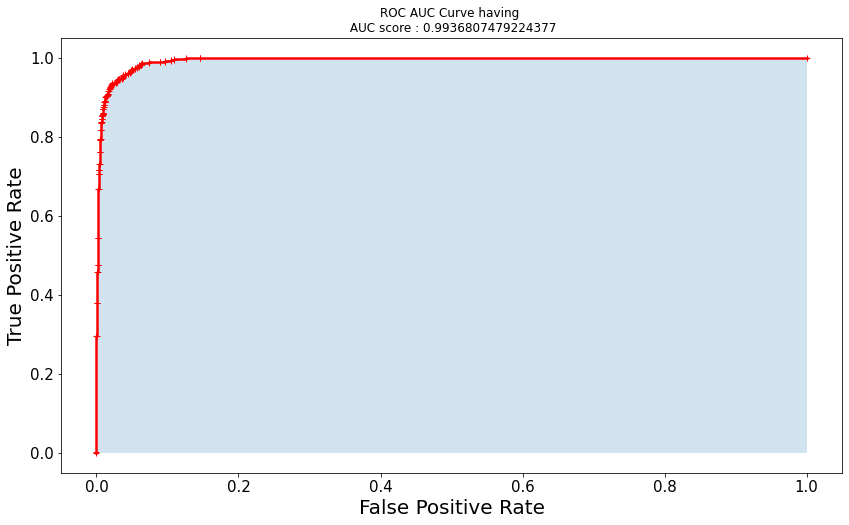

In [47]:
#define metrics
best_model = XGBClassifier(eval_metric='auc', random_state = 2022)
best_model.fit(X_train,y_train)
y_pred_proba = best_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.figure(figsize = (14,8))
plt.plot(fpr,tpr, 'b+', linewidth=2.5, color='r', linestyle = '-')
plt.fill_between(fpr, tpr, alpha = 0.2 )
plt.ylabel('True Positive Rate', size = 20)
plt.xlabel('False Positive Rate', size = 20)
plt.yticks(size=15)
plt.xticks(size=15)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.title(f'ROC AUC Curve having \n AUC score : {auc_score}')
plt.savefig('Best Model 1 - ROC AUC Curve.jpg')
plt.show()

## **Compare XGBoost Before Tuning Predict with Actual**

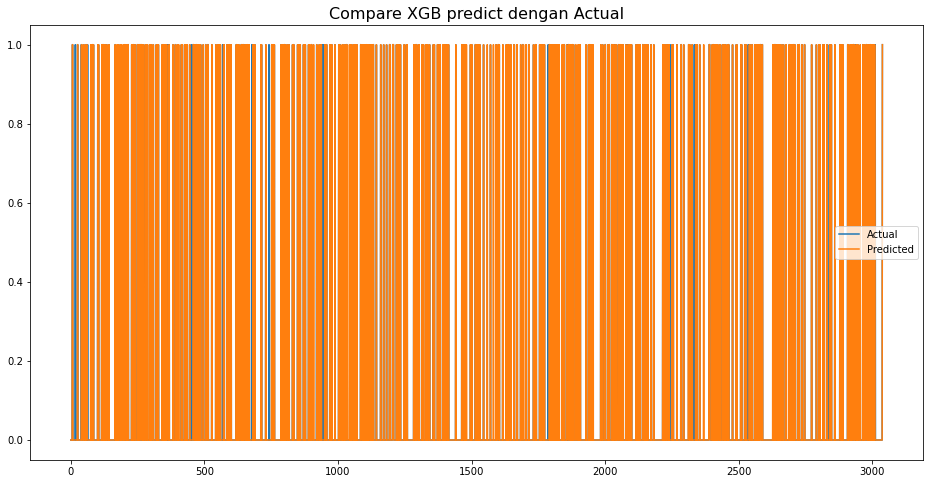

In [48]:
y_pred_xgb = best_model.predict(X_test)
test = pd.DataFrame({'Predicted':y_pred_xgb,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:])
plt.title('Compare XGB predict dengan Actual', size = 16)
plt.savefig('Best Model 1 - Compare XGBoost predict with Actual.jpg')
plt.legend(['Actual','Predicted'])

In [49]:
test['Different'] = test['Actual'] - test['Predicted']
sum_wrong = test[test['Different'] != 0]['Different'].count()

In [50]:
print(f'Percentage Wrong predict {sum_wrong/len(y_test)*100}%')

Percentage Wrong predict 2.895689371503784%


# **Test Machine Learning**

In [51]:
import pickle

In [52]:
# Save Machine Learning
file_name = 'Churn Predict.sav'
best_model = XGBClassifier(eval_metric='auc', random_state = 2022).fit(X_train,y_train)
pickle.dump(best_model, open(file_name,'wb'))

In [53]:
# Load Machine Learning
loaded_model = pickle.load(open(file_name,'rb'))
loaded_model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 1.])

In [54]:
df_raw.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [55]:
X_test.head(2)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,53,0,4,4,1,3,0,34,1,2,3,13679.0,0,13679.0,0.908,4060,61,1.346,0.000
1,45,0,4,5,1,3,0,39,2,3,2,1438.3,1162,276.3,0.539,4598,86,0.623,0.808


In [56]:
churn_pred = pd.DataFrame({
    'Customer_Age': [53, 45],
    'Gender': [0, 0],
    'Dependent_count': [4, 4],
    'Education_Level': [4, 5],
    'Marital_Status': [1, 1],
    'Income_Category': [3, 3],
    'Card_Category': [0, 0],
    'Months_on_book': [34, 39],
    'Total_Relationship_Count': [1, 2],
    'Months_Inactive_12_mon': [2, 3],
    'Contacts_Count_12_mon': [3, 2],
    'Credit_Limit': [13679.0, 1438.3],
    'Total_Revolving_Bal': [0, 1162],
    'Avg_Open_To_Buy': [13679.0, 276.3],
    'Total_Amt_Chng_Q4_Q1': [0.908, 0.539],
    'Total_Trans_Amt': [4060, 4598],
    'Total_Trans_Ct': [61, 86],
    'Total_Ct_Chng_Q4_Q1': [1.346, 0.623],
    'Avg_Utilization_Ratio': [0.000, 0.808]   
})
churn_pred

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,53,0,4,4,1,3,0,34,1,2,3,13679.0,0,13679.0,0.908,4060,61,1.346,0.000
1,45,0,4,5,1,3,0,39,2,3,2,1438.3,1162,276.3,0.539,4598,86,0.623,0.808


In [57]:
print('Prediction index 0 and 1')
loaded_model.predict(churn_pred)
print('2 data we predict both of them not Churn')

Prediction index 0 and 1
2 data we predict both of them not Churn


In [58]:
print(f'Actual {y_test.iloc[0]} dan {y_test.iloc[1]}')
print('2 data actual both of them is not Churn too')

Actual 0.0 dan 0.0
2 data actual both of them is not Churn too


# **Conclusion**

<font size="4">With this machine learning, bank companies can **predict which customers will stay and will churn**, with **the percentage of wrong is only 2.9% and correct is 97.1%**.</font>

<font size="4">**By knowing which customers will churn, we can provide promotions so that customers do not churn or move to another bank**</font>